<a href="https://colab.research.google.com/github/seulkioh91/pythonbasic/blob/main/20210610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

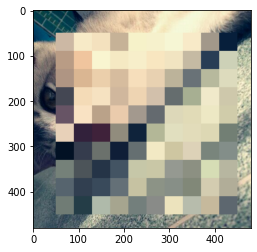

In [ ]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread("cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)

# 이미지 출력하기
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()



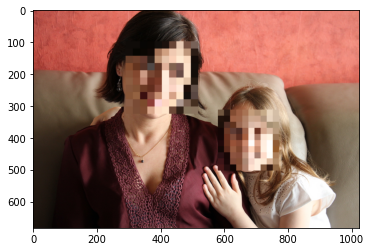

In [ ]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기 --- (*4)
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
digits = datasets.load_digits()


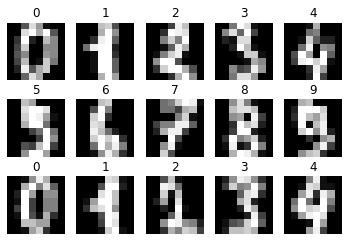

In [ ]:
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.axis("off")
  plt.title(str(digits.target[i]))
  plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# 데이터 읽어 들이기 --- (*1)
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 2차원 배열을 1차원 배열로 변환하기 --- (*2)

# 데이터를 학습 전용과 테스트 전용으로 분리하기 --- (*3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 데이터 학습하기 --- (*4)
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 예측하고 정답률 출력하기 --- (*5)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9527777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.externals import joblib
joblib.dump(clf,'digits.pkl')

['digits.pkl']

In [ ]:
import cv2
from sklearn.externals import joblib

def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    clf = joblib.load("digits.pkl")
    # 직접 그린 손글씨 이미지 읽어 들이기
    my_img = cv2.imread(filename)
    # 이미지 데이터를 학습에 적합하게 변환하기
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 흑백 반전
    # 2차원 배열을 1차원 배열로 변환하기
    my_img = my_img.reshape((-1, 64))
    # 데이터 예측하기
    res = clf.predict(my_img)
    return res[0]

n = predict_digit("my2.png")
print("my2.png = " + str(n))
n = predict_digit("my4.png")
print("my4.png = " + str(n))
n = predict_digit("my9.png")
print("my9.png = " + str(n))

my2.png = 2
my4.png = 4
my9.png = 4


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8] 191 191


TypeError: ignored

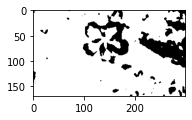

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 이미지 읽어 들이고 크기 변경하기 --- (*1)
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))

# 색공간 변경하기 --- (*2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0) 
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 화면 왼쪽에 변환한 이미지 출력하기 --- (*3)
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 윤곽 검출하기 --- (*4)
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[1]
# # 검출한 윤곽 그리기 --- (*5)
# for pt in cnts:
#     x, y, w, h = cv2.boundingRect(pt)
    # 너무 크거나 너무 작은 부분 제거하기
    # if w < 30 or w > 200: continue
print(x,y,w,h) # 결과 출력하기
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 화면 오른쪽에 결과 출력하기 --- (*6)
# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.savefig("obj1.png", dpi=200)
plt.show()

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Unicode 코드 포인트로 출현 빈도 판정하기 --- (*1)
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기 --- (*2)
    counter = np.zeros(65535)

    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기 --- (*3)
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기 --- (*4)
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기 --- (*5)
    counter = counter/len(str)
    return counter

# 학습 전용 데이터 준비하기
ko_str = '이것은 한국어 문장입니다.'
ja_str = 'これはの文章です。'
en_str = 'This is English Sentences.'

x_train = [count_codePoint(ko_str),count_codePoint(ja_str),count_codePoint(en_str)]
y_train = ['ko','ja','en']

# 학습하기 --- (*6)
clf = GaussianNB() 
clf.fit(x_train, y_train)

# 평가 전용 데이터 준비하기
ko_test_str = '안녕하세요'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'

x_test = [count_codePoint(en_test_str),count_codePoint(ja_test_str),count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

# 평가하기 --- (*7)
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))

['en' 'ja' 'ko']
정답률 =  1.0


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import glob

# Unicode 코드 포인트로 출현 빈도 판정하기
def count_codePoint(str):
    # Unicode 코드 포인트를 저장할 배열 준비하기
    counter = np.zeros(65535)

    for i in range(len(str)):
        # 각 문자를 Unicode 코드 포인트로 변환하기
        code_point = ord(str[i])
        if code_point > 65535 :
            continue
        # 출현 횟수 세기
        counter[code_point] += 1

    # 각 요소를 문자 수로 나눠 정규화하기
    counter = counter/len(str)
    return counter

# 학습 데이터 준비하기 --- (*1)
index = 0
x_train = []
y_train = []
for file in glob.glob('*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기 --- (*2)
    y_train.append(file[8:10])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기 --- (*3)
    file_str = ''
    for line in open(file, 'r'):
        file_str = file_str + line
    x_train.append(count_codePoint(file_str))

# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

# 평가 데이터 준비하기 --- (*4)
index = 0
x_test = []
y_test = []
for file in glob.glob('*.txt'):
    # 언어 정보를 추출하고 레이블로 지정하기
    y_test.append(file[7:9])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기
    file_str = ''
    for line in open(file, 'r'):
        file_str = file_str + line
    x_test.append(count_codePoint(file_str)) 

# 평가하기
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred))

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')